<a href="https://colab.research.google.com/github/Pallavisuma/CMPE257-Fall23-PallaviSuma-Kurmala/blob/homework-3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np



In [2]:
def initialize_weights(x ,y, hidden_layers):
    W1 = np.random.randn(hidden_layers,x) * 0.01
    b1 = np.zeros(shape=(hidden_layers, 1))
    W2 = np.random.randn(y,hidden_layers) * 0.01
    b2 = np.zeros(shape=(y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [3]:
def tanh_activation(Z):
    """
    Compute the derivative of tanh activation.
    """
    A = np.tanh(Z)
    dZ = 1 - np.power(A, 2)
    return dZ

def forwardprop(X, parameters):
    """
    Perform forward propagation.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = tanh_activation(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh_activation(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache



In [4]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    A1, A2 = cache["A1"], cache["A2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * tanh_activation(cache["Z1"])
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients



In [5]:
def compute_cost(A2, Y):
    """
    Compute the squared error cost.
    """
    m = Y.shape[1]
    cost = np.sum((A2 - Y) ** 2)
    return cost

In [6]:
def update_parameters(parameters, gradients, learning_rate):
    """
    Update the parameters using gradient descent.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1, db1, dW2, db2 = gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    updated_parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return updated_parameters

In [7]:

def neural_network_model(X, Y, hidden_size, learning_rate, num_iterations):
    """
    Train the neural network model.
    """
    x=X.shape[0]
    y=Y.shape[0]

    parameters = initialize_weights(x,y,hidden_size)

    for i in range(num_iterations):

        A2, cache = forwardprop(X, parameters)

        # Compute Cost
        cost = compute_cost(A2, Y)

        # Backward Propagation
        gradients = backward_propagation(parameters, cache, X, Y)

        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters

In [8]:
X=np.array([[2,0.1],[3,0.4]])
Y=np.array([[1]])
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer
print(n_x)
print(n_y)

trained_parameters = neural_network_model(X, Y, n_h, 0.01, 20)
print(trained_parameters)

2
1
Cost after iteration 0: 5.050903469273618e-08
{'W1': array([[ 0.00195003,  0.0028736 ],
       [ 0.01033202,  0.01122933],
       [ 0.01000935,  0.00838107],
       [-0.00860273,  0.00012065]]), 'b1': array([[ 1.22231028e-07],
       [-2.77015281e-07],
       [-4.87944412e-08],
       [-1.90500335e-07]]), 'W2': array([[ 0.00390858, -0.00881671, -0.00153872, -0.00604982]]), 'b2': array([[3.14074725e-05]])}


Task 3

In [9]:
import pandas as pd
import numpy as np
def proper_df(input_data):
  data = []
  N, M = input_data.shape
  for i in range(N):
    string = input_data.iloc[i]
    list_at_i = [float(x) for x in string[0].split()]
    data.append(list_at_i)
  df = pd.DataFrame(data, columns = get_lables())
  return df


def get_lables():
  column_names = ['label']
  column_names.extend([str(x) for x in range(256)])
  return column_names


def calculate_intensity(df):
    pixel_values = df.iloc[:, 1:].values

    mean_absolute_intensity = np.mean(np.abs(pixel_values), axis=1)

    # df['Mean_Absolute_Intensity'] = mean_absolute_intensity

    # intensity_column = df.iloc[:, 1:].mean(axis=1)
    df['x1'] = mean_absolute_intensity
    return df

def calculate_symmetry(df):
    pixel_values = df.iloc[:, 1:].values
    n = pixel_values.shape[1]
    cms_symmetry = np.sum(np.abs(pixel_values - np.flip(pixel_values, axis=1)), axis=1) / n
    df['x2'] = cms_symmetry
    return df

def get_preprocessed_digits_dataframe(file_path):
  digit_train_data = pd.read_csv(file_path)
  digit_train_df = proper_df(digit_train_data)
  filter_labels = [1.0, 5.0]
  filtered_digit_train_df = digit_train_df[digit_train_df['label'].isin(filter_labels)]
  binary_filtered_digit_train_df = filtered_digit_train_df.copy()
  binary_filtered_digit_train_df['label'] = binary_filtered_digit_train_df['label'].replace(5.0, -1.0)
  return binary_filtered_digit_train_df

In [11]:
binary_filtered_digit_train_df = get_preprocessed_digits_dataframe('/content/ZipDigits (1).train')
binary_filtered_digit_train_df = binary_filtered_digit_train_df.rename(columns={'label': 'y'})
binary_filtered_digit_train_df = calculate_intensity(binary_filtered_digit_train_df)
binary_filtered_digit_train_df = calculate_symmetry(binary_filtered_digit_train_df)
train_df = binary_filtered_digit_train_df[['x1', 'x2', 'y']]
positive_train_df = train_df[train_df['y'] == 1.0]
negative_train_df = train_df[train_df['y'] == -1.0]

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_ = train_df[['x1', 'x2']].values
y_ = train_df['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)
print(X_train)
print(Y_train)

[[0.92737891 0.85816016 0.92778906 ... 0.95473438 0.86923828 0.83347266]
 [0.20394069 0.54808685 0.23679213 ... 0.23759326 0.55617306 0.78082858]]
[[ 1. -1.  1. ...  1. -1. -1.]]


In [13]:
hidden_size = 4
learning_rate = 0.01
num_iterations = 2 * 10**6

# Initialize and train the neural network with stochastic gradient descent
def neural_network_model_sgd(X, Y, hidden_size, learning_rate, num_iterations):
    input_size = X.shape[0]
    output_size = Y.shape[0]
    costs = []
    parameters = initialize_weights(input_size, output_size, hidden_size)

    for i in range(num_iterations):
        # Randomly select one sample for stochastic gradient descent
        random_index = np.random.randint(0, X.shape[1])
        x_sample = X[:, random_index].reshape(-1, 1)
        y_sample = Y[:, random_index].reshape(-1, 1)

        # Forward Propagation
        A2, cache = forwardprop(x_sample, parameters)

        # Compute Cost
        cost = compute_cost(A2, y_sample)
        costs.append(cost)

        # Backward Propagation
        gradients = backward_propagation(parameters, cache, x_sample, y_sample)

        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters,costs

# Train the neural network with stochastic gradient descent
trained_parameters_sgd ,costs  = neural_network_model_sgd(X_train, Y_train, hidden_size, learning_rate, num_iterations)

# Test the trained model on the test set
def predict(parameters, X):
    A2, _ = forwardprop(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

# Make predictions on the test set
predictions = predict(trained_parameters_sgd, X_test)

# Evaluate the accuracy
accuracy = np.mean(predictions == Y_test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

Streaming output truncated to the last 5000 lines.
Cost after iteration 1500100: 2.0411549968910934
Cost after iteration 1500200: 0.36637735319689924
Cost after iteration 1500300: 0.9999981331723533
Cost after iteration 1500400: 1.985908336625272
Cost after iteration 1500500: 0.999999948053764
Cost after iteration 1500600: 2.189862020098933
Cost after iteration 1500700: 0.2687255820624403
Cost after iteration 1500800: 0.2704135672154523
Cost after iteration 1500900: 0.4521595597172096
Cost after iteration 1501000: 1.5518478496536043
Cost after iteration 1501100: 0.3832604218337331
Cost after iteration 1501200: 0.37852132504457486
Cost after iteration 1501300: 0.4656996270563062
Cost after iteration 1501400: 0.9999918353510701
Cost after iteration 1501500: 2.168350424430164
Cost after iteration 1501600: 1.0
Cost after iteration 1501700: 0.36110418692990653
Cost after iteration 1501800: 0.7180681923477246
Cost after iteration 1501900: 0.1993427760557203
Cost after iteration 1502000: 0.23

In [14]:
# Test the trained model on the test set
def predict(parameters, X):
    A2, _ = forwardprop(X, parameters)
    print(A2)
    predictions = (A2 > 0).astype(int)
    return predictions

# Make predictions on the test set
predictions = predict(trained_parameters_sgd, X_test)

print(predictions)
# Evaluate the accuracy
accuracy = np.mean(predictions == Y_test)
print("Test Accuracy with Stochastic Gradient Descent:", accuracy)

[[4.38078315e-01 4.25259351e-01 4.37425228e-01 4.37263901e-01
  4.38047038e-01 4.38074868e-01 1.31668881e-01 4.08293396e-01
  4.03907317e-01 4.27217070e-01 8.80489359e-02 4.32555260e-01
  1.14808795e-04 4.15358036e-01 4.38079640e-01 1.03699946e-02
  1.99840144e-15 2.99091228e-03 0.00000000e+00 7.88595958e-02
  1.03169339e-07 4.38079572e-01 6.61195474e-02 4.29464184e-01
  3.66957408e-01 3.73730004e-01 4.37505858e-01 3.80274569e-01
  4.37966289e-01 4.37020049e-01 3.56720109e-01 4.38079609e-01
  4.26871793e-01 3.85245347e-01 4.28309036e-01 8.56415351e-02
  4.33143296e-01 4.38070310e-01 4.21278669e-01 4.24036115e-01
  4.24557847e-01 3.91795503e-01 4.35115388e-01 4.35760532e-01
  3.78054351e-01 3.33994112e-01 1.44505228e-01 3.11386498e-01
  4.26012097e-01 4.35022177e-01 3.69377864e-02 4.36828312e-01
  1.81415724e-08 4.38036872e-01 3.31709722e-01 4.38008965e-01
  4.05655697e-01 4.11248268e-01 2.24719198e-02 4.35040514e-01
  3.93275169e-01 0.00000000e+00 2.14803558e-01 3.20670015e-01
  1.3078

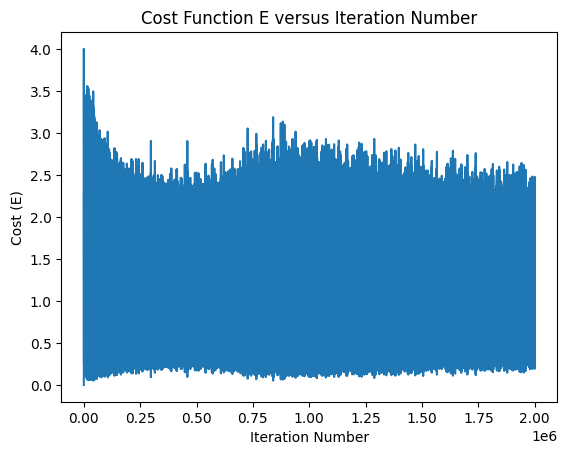

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(costs)), costs)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E)')
plt.title('Cost Function E versus Iteration Number')
plt.show()

Part  5

In [16]:
# Make predictions on the test set
test_predictions = predict(trained_parameters_sgd, X_test)

# Evaluate the test accuracy
test_accuracy = np.mean(test_predictions == Y_test)
print("Test Accuracy:", test_accuracy)

[[4.38078315e-01 4.25259351e-01 4.37425228e-01 4.37263901e-01
  4.38047038e-01 4.38074868e-01 1.31668881e-01 4.08293396e-01
  4.03907317e-01 4.27217070e-01 8.80489359e-02 4.32555260e-01
  1.14808795e-04 4.15358036e-01 4.38079640e-01 1.03699946e-02
  1.99840144e-15 2.99091228e-03 0.00000000e+00 7.88595958e-02
  1.03169339e-07 4.38079572e-01 6.61195474e-02 4.29464184e-01
  3.66957408e-01 3.73730004e-01 4.37505858e-01 3.80274569e-01
  4.37966289e-01 4.37020049e-01 3.56720109e-01 4.38079609e-01
  4.26871793e-01 3.85245347e-01 4.28309036e-01 8.56415351e-02
  4.33143296e-01 4.38070310e-01 4.21278669e-01 4.24036115e-01
  4.24557847e-01 3.91795503e-01 4.35115388e-01 4.35760532e-01
  3.78054351e-01 3.33994112e-01 1.44505228e-01 3.11386498e-01
  4.26012097e-01 4.35022177e-01 3.69377864e-02 4.36828312e-01
  1.81415724e-08 4.38036872e-01 3.31709722e-01 4.38008965e-01
  4.05655697e-01 4.11248268e-01 2.24719198e-02 4.35040514e-01
  3.93275169e-01 0.00000000e+00 2.14803558e-01 3.20670015e-01
  1.3078

In [17]:
print(X_train.shape[1])
k=X_train.shape[1]
numbacthes = k//32
print(numbacthes)

1248
39


HP-2

In [ ]:
def mini_batch_gradient_descent(X, Y, hidden_size, learning_rate, num_epochs, batch_size):
    input_size = X.shape[0]
    output_size = Y.shape[0]
    costs = []
    # Initialize weights with Xavier initialization
    parameters = initialize_weights(input_size, output_size, hidden_size)

    # Number of mini-batches
    num_batches = len(X.T) // batch_size

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(len(X.T))
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]

        for batch in range(num_batches):
            # Select mini-batch
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            X_batch = X_shuffled[:, start_idx:end_idx]
            Y_batch = Y_shuffled[:, start_idx:end_idx]

            # Forward Propagation
            A2, cache = forwardprop(X_batch, parameters)

            # Compute Cost
            cost = compute_cost(A2, Y_batch)

            # Append the average cost to the list
            costs.append(cost / batch_size)

            # Backward Propagation
            gradients = backward_propagation(parameters, cache, X_batch, Y_batch)

            # Update Parameters
            parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Cost after epoch {epoch}: {costs[-1]}")

    return parameters, costs

# Set hyperparameters
hidden_size = 4
learning_rate = 0.01
num_epochs = 2 * 10**6  # Adjust as needed
batch_size = 32  # Mini-batch size

# Perform mini-batch gradient descent
trained_parameters_mini_batch, costs_mini_batch = mini_batch_gradient_descent(X_train, Y_train, hidden_size, learning_rate, num_epochs, batch_size)

# Test the trained model on the test set
print(costs_mini_batch)


Streaming output truncated to the last 5000 lines.
Cost after epoch 813300: 0.9748651231093902
Cost after epoch 813400: 0.9414945026256076
Cost after epoch 813500: 1.0151732227526307
Cost after epoch 813600: 0.7924421936417401
Cost after epoch 813700: 0.9389494748968733
Cost after epoch 813800: 1.0127490692777124
Cost after epoch 813900: 0.9755585346599682
Cost after epoch 814000: 0.937329729689136
Cost after epoch 814100: 1.1210087091896637
Cost after epoch 814200: 0.938844071369363
Cost after epoch 814300: 0.8660987802603737
Cost after epoch 814400: 0.86467300808752
Cost after epoch 814500: 0.9037077314466588
Cost after epoch 814600: 0.8684221361455666
Cost after epoch 814700: 0.8301112231052086
Cost after epoch 814800: 0.8639140791019575
Cost after epoch 814900: 0.7579111102053375
Cost after epoch 815000: 1.0854435079322788
Cost after epoch 815100: 0.8285853171003572
Cost after epoch 815200: 1.0145491647035763
Cost after epoch 815300: 0.6849416179601079
Cost after epoch 815400: 0.93

In [ ]:
print(costs_mini_batch)
import matplotlib.pyplot as plt
plt.plot(range(len(costs_mini_batch)), costs_mini_batch)
plt.xlabel('Iteration Number')
plt.ylabel('Cost (E)')
plt.title('Cost Function E versus Iteration Number')
plt.show()